In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn import metrics

In [2]:
os.chdir(r"C:\Users\abhed\OneDrive\Desktop\Advet\Imarticus\Python\Analytics in Sales\Analytics in Sales Project\Dataset")

In [3]:
os.listdir()

['Supermarket_sales_prediction.csv']

In [4]:
sales=pd.read_csv('Supermarket_sales_prediction.csv')

#### EDA

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### Univariate

##### Categorical

In [7]:
#function to check for all details in object type

def univariate_categorical(data,var):
    miss=data[var].isnull().sum()
    unicat=data[var].nunique()
    uncat_list=data[var].unique()
    
    h=pd.DataFrame(data[var].value_counts().reset_index())
    h.columns=[var, "Count"]
    
    k=pd.DataFrame(data[var].value_counts(normalize=True).reset_index())
    k.columns=[var, "Percentage"]
    k["Percentage"]=(round(k["Percentage"]*100,2)).astype("str")+str("%")
    
    final=pd.merge(h,k, on=var, how="inner")
    
    print(f"Missing counts: {miss}\n")
    print(f"Total unique counts: {unicat}\n")
    print(f"Unique categories: {uncat_list}\n")
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=var)
    plt.xticks(rotation=45)
    plt.show()
    return final
    
    

Missing counts: 0

Total unique counts: 1559

Unique categories: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']



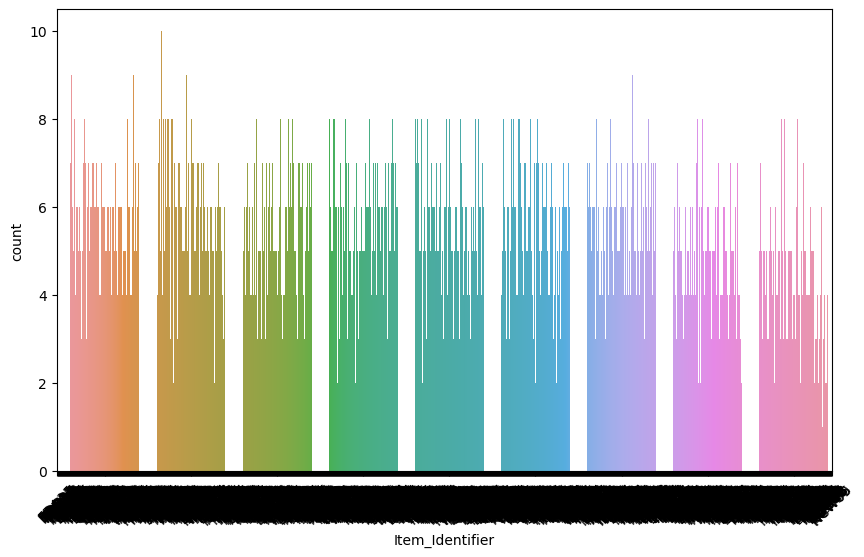

,Item_Identifier,Count,Percentage
0,FDW13,10,0.12%
1,FDG33,10,0.12%
2,NCY18,9,0.11%
3,FDD38,9,0.11%
4,DRE49,9,0.11%
...,...,...,...
1554,FDY43,1,0.01%
1555,FDQ60,1,0.01%
1556,FDO33,1,0.01%
1557,DRF48,1,0.01%


In [8]:
univariate_categorical(sales,"Item_Identifier")

In [9]:
sales["new"]=sales["Item_Identifier"].str[:2]
sales["new"].value_counts()

FD    6125
NC    1599
DR     799
Name: new, dtype: int64

In [10]:
sales.drop(columns=["new","Item_Identifier"], inplace=True)

Missing counts: 0

Total unique counts: 5

Unique categories: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']



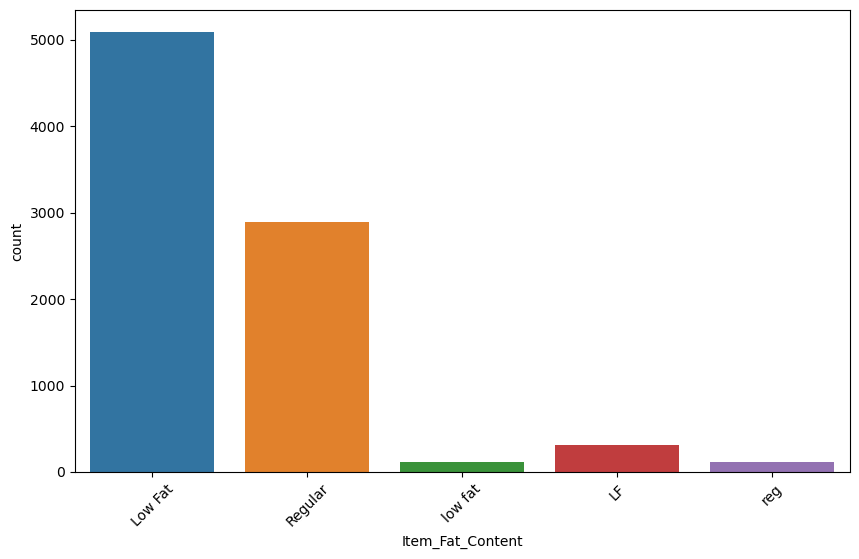

,Item_Fat_Content,Count,Percentage
0,Low Fat,5089,59.71%
1,Regular,2889,33.9%
2,LF,316,3.71%
3,reg,117,1.37%
4,low fat,112,1.31%


In [11]:
univariate_categorical(sales,"Item_Fat_Content")

In [12]:
def item(x):
    if x=="Low Fat" or x=="low fat" or x=="LF":
        x="low fat"
    elif x=="Regular" or x=="reg":
        x="regular"
    
    return x      

In [13]:
sales["Item_Fat_Content"]=sales["Item_Fat_Content"].apply(item)
sales["Item_Fat_Content"].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
label=preprocessing.LabelEncoder()
sales["Item_Fat_Content"]=label.fit_transform(sales["Item_Fat_Content"])
sales["Item_Fat_Content"].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

Missing counts: 0

Total unique counts: 16

Unique categories: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']



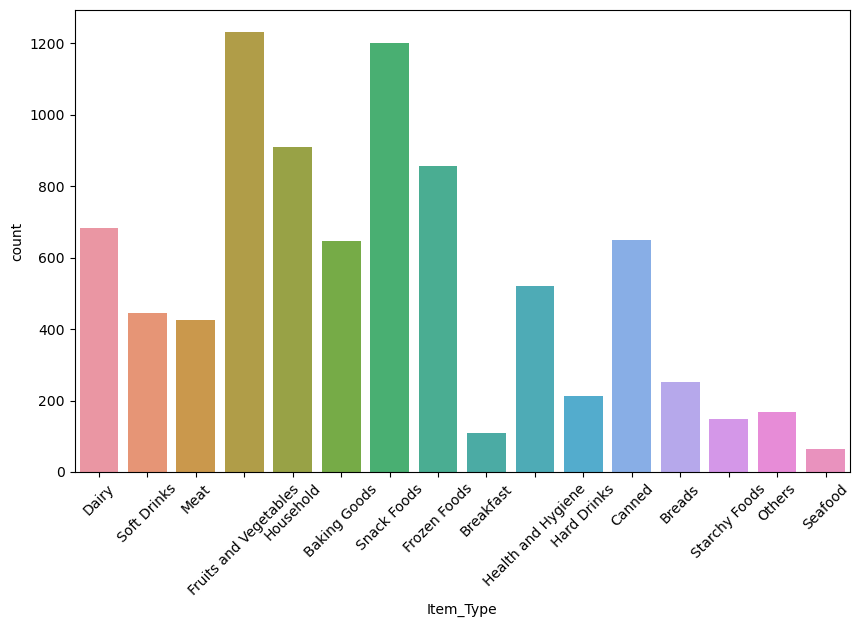

,Item_Type,Count,Percentage
0,Fruits and Vegetables,1232,14.46%
1,Snack Foods,1200,14.08%
2,Household,910,10.68%
3,Frozen Foods,856,10.04%
4,Dairy,682,8.0%
5,Canned,649,7.61%
6,Baking Goods,648,7.6%
7,Health and Hygiene,520,6.1%
8,Soft Drinks,445,5.22%
9,Meat,425,4.99%


In [15]:
univariate_categorical(sales,"Item_Type")

Missing counts: 0

Total unique counts: 10

Unique categories: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']



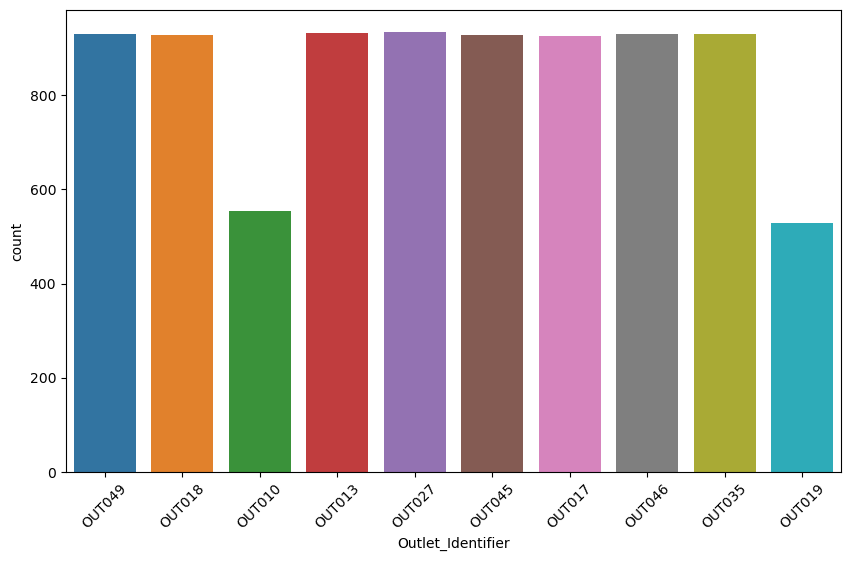

,Outlet_Identifier,Count,Percentage
0,OUT027,935,10.97%
1,OUT013,932,10.94%
2,OUT049,930,10.91%
3,OUT046,930,10.91%
4,OUT035,930,10.91%
5,OUT045,929,10.9%
6,OUT018,928,10.89%
7,OUT017,926,10.86%
8,OUT010,555,6.51%
9,OUT019,528,6.2%


In [16]:
univariate_categorical(sales,"Outlet_Identifier")

Missing counts: 2410

Total unique counts: 3

Unique categories: ['Medium' nan 'High' 'Small']



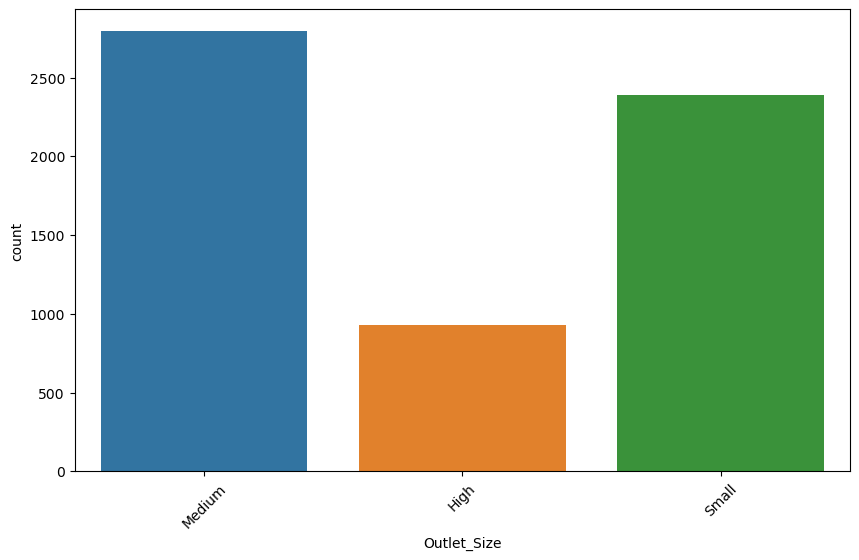

,Outlet_Size,Count,Percentage
0,Medium,2793,45.69%
1,Small,2388,39.06%
2,High,932,15.25%


In [17]:
univariate_categorical(sales,"Outlet_Size")

In [18]:
pd.crosstab(sales["Outlet_Type"],sales["Outlet_Size"])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [19]:
sales[sales['Outlet_Size'].isna()]["Outlet_Type"].value_counts()

#since all of grocery and majority of type1 is small hence filling small

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [20]:
sales["Outlet_Size"]=sales["Outlet_Size"].fillna("Small")
sales["Outlet_Size"].isnull().sum()

0

In [21]:
#ordinal encoding
sales["Outlet_Size"]=sales["Outlet_Size"].map({"Small":0,"Medium":1,"High":2})

Missing counts: 0

Total unique counts: 3

Unique categories: ['Tier 1' 'Tier 3' 'Tier 2']



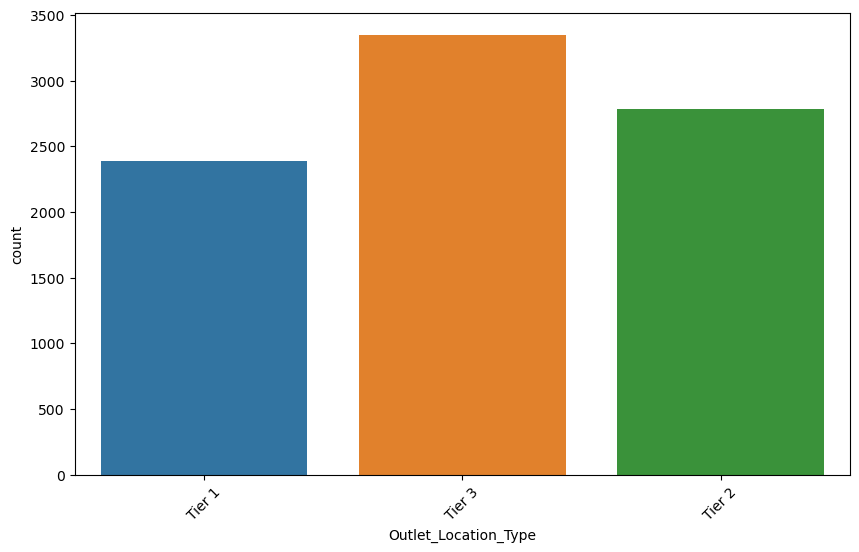

,Outlet_Location_Type,Count,Percentage
0,Tier 3,3350,39.31%
1,Tier 2,2785,32.68%
2,Tier 1,2388,28.02%


In [22]:
univariate_categorical(sales,"Outlet_Location_Type")

Missing counts: 0

Total unique counts: 4

Unique categories: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



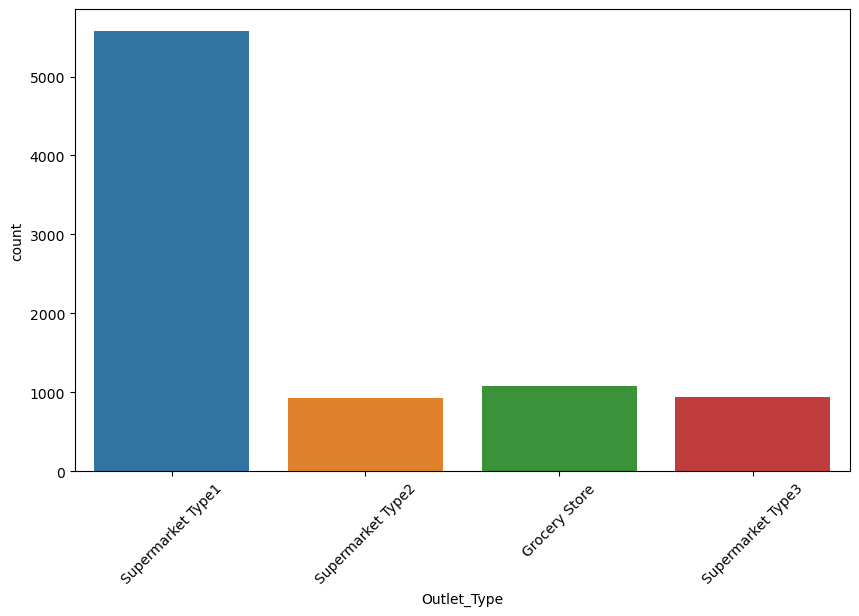

,Outlet_Type,Count,Percentage
0,Supermarket Type1,5577,65.43%
1,Grocery Store,1083,12.71%
2,Supermarket Type3,935,10.97%
3,Supermarket Type2,928,10.89%


In [23]:
univariate_categorical(sales,"Outlet_Type")

##### Numerical

In [24]:
#function to check for all details in numeric type

def univariate_numerical(data,vari):
    result={"Missing":data[vari].isnull().sum(),
           "min":data[vari].min(),
           "max":data[vari].max(),
           "mean":data[vari].mean(),
           "standard deviation":data[vari].std(),
           "variance":data[vari].var(),
           "skewness":data[vari].skew(),
           "kurtosis":data[vari].kurt(),
           "25th Percentile":data[vari].quantile(0.25),
           "50th Percentile":data[vari].quantile(0.5),
           "75th Percentile":data[vari].quantile(0.75)
           }
    plt.figure(figsize=(6,4))
    plt.subplot(121)
    sns.histplot(data[vari])
    plt.subplot(122)
    sns.boxplot(data=data,y=vari)
    plt.show()
    return result

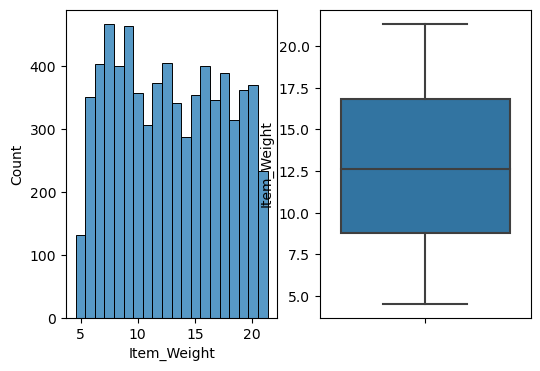

{'Missing': 1463,
 'min': 4.555,
 'max': 21.35,
 'mean': 12.857645184135976,
 'standard deviation': 4.643456499186395,
 'variance': 21.56168825983637,
 'skewness': 0.0824262091221237,
 'kurtosis': -1.2277664144376634,
 '25th Percentile': 8.77375,
 '50th Percentile': 12.6,
 '75th Percentile': 16.85}

In [25]:
univariate_numerical(sales,"Item_Weight")

In [26]:
sales.groupby(["Item_Type"]).agg({"Item_Weight":["mean"]})

,Item_Weight
,mean
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [27]:
#filling median value according to item type

sales["Item_Weight"]=sales.groupby(["Item_Type"])["Item_Weight"].transform(lambda x: x.fillna(x.median()))

In [28]:
sales["Item_Weight"].isnull().sum()

0

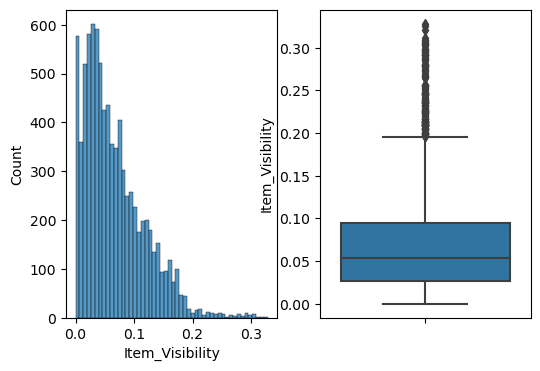

{'Missing': 0,
 'min': 0.0,
 'max': 0.328390948,
 'mean': 0.06613202877895108,
 'standard deviation': 0.051597822321135196,
 'variance': 0.0026623352682834376,
 'skewness': 1.1670905496918396,
 'kurtosis': 1.6794454826024237,
 '25th Percentile': 0.0269894775,
 '50th Percentile': 0.053930934,
 '75th Percentile': 0.0945852925}

In [29]:
univariate_numerical(sales,"Item_Visibility")

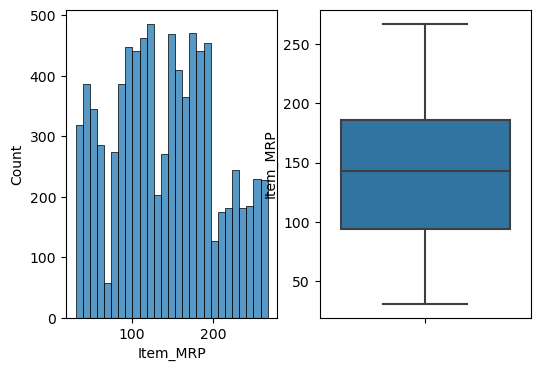

{'Missing': 0,
 'min': 31.29,
 'max': 266.8884,
 'mean': 140.9927819781767,
 'standard deviation': 62.27506651219039,
 'variance': 3878.1839090977373,
 'skewness': 0.1272022683110526,
 'kurtosis': -0.8897690936963571,
 '25th Percentile': 93.8265,
 '50th Percentile': 143.0128,
 '75th Percentile': 185.6437}

In [30]:
univariate_numerical(sales,"Item_MRP")

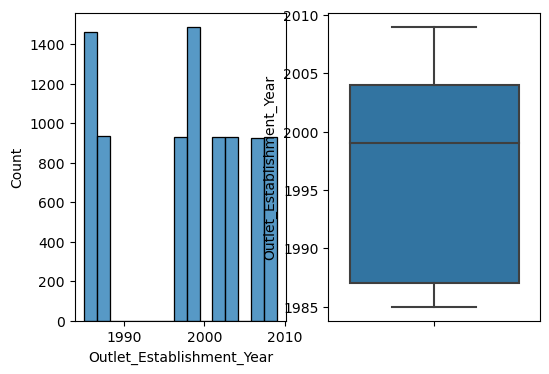

{'Missing': 0,
 'min': 1985,
 'max': 2009,
 'mean': 1997.8318667135984,
 'standard deviation': 8.371760408092706,
 'variance': 70.08637233050855,
 'skewness': -0.39664078591550556,
 'kurtosis': -1.2056939170205112,
 '25th Percentile': 1987.0,
 '50th Percentile': 1999.0,
 '75th Percentile': 2004.0}

In [31]:
univariate_numerical(sales,"Outlet_Establishment_Year")

In [32]:
#getting number of years of the store
from datetime import date 

sales["curr"]=date.today().year
sales["years"]=sales["curr"]-sales["Outlet_Establishment_Year"]
sales["years"]

0       24
1       14
2       24
3       25
4       36
        ..
8518    36
8519    21
8520    19
8521    14
8522    26
Name: years, Length: 8523, dtype: int64

In [33]:
sales.drop(columns=["curr","Outlet_Establishment_Year"], inplace=True)

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  years                 8523 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(4)
memory usage: 699.3+ KB


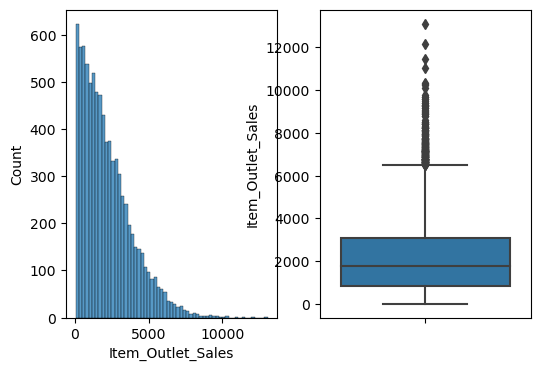

{'Missing': 0,
 'min': 33.29,
 'max': 13086.9648,
 'mean': 2181.288913575032,
 'standard deviation': 1706.499615733832,
 'variance': 2912140.938499716,
 'skewness': 1.1775306028542796,
 'kurtosis': 1.6158766814287264,
 '25th Percentile': 834.2474,
 '50th Percentile': 1794.331,
 '75th Percentile': 3101.2964}

In [35]:
univariate_numerical(sales,"Item_Outlet_Sales")

##### Multicollinearity

C:\Users\abhed\AppData\Local\Temp\ipykernel_18576\1578113766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=sales.corr()


[]

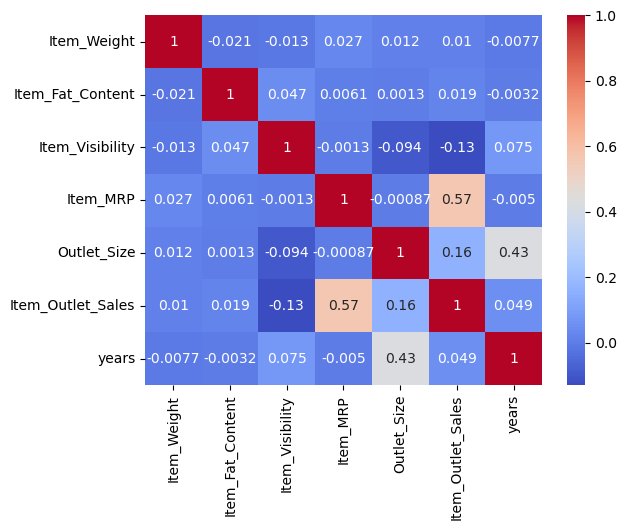

In [36]:
cr=sales.corr()
sns.heatmap(cr,annot=True, cmap="coolwarm")
plt.plot()

##### Dummy

In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  years                 8523 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(4)
memory usage: 699.3+ KB


In [38]:
sales1=pd.get_dummies(data=sales,columns=["Outlet_Location_Type","Item_Type","Outlet_Type","Outlet_Identifier"],drop_first=True)

In [39]:
sales1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,years,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Type_Breads,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1,3735.1380,24,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,1,443.4228,14,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,1,2097.2700,24,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,0,732.3800,25,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,2,994.7052,36,0,1,0,...,0,1,0,0,0,0,0,0,0,0


##### Checking for normality

In [40]:
from scipy import stats

stats.jarque_bera(sales1["Item_Outlet_Sales"])

Jarque_beraResult(statistic=2894.2983825765023, pvalue=0.0)

In [41]:
sales1["y"]=np.log(sales["Item_Outlet_Sales"])

(array([  53.,   99.,  326.,  429.,  784., 1251., 2051., 2276., 1156.,
          98.]),
 array([3.50525705, 4.10266854, 4.70008003, 5.29749152, 5.89490302,
        6.49231451, 7.089726  , 7.68713749, 8.28454898, 8.88196047,
        9.47937196]),
 <BarContainer object of 10 artists>)

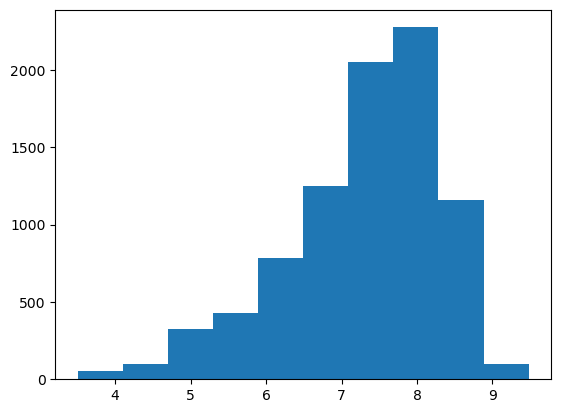

In [42]:
plt.hist(sales1["y"])

In [43]:
sales1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Item_Outlet_Sales', 'years',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'y'],
      

In [44]:
x=sales1[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'years',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']]

y=sales1["y"]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
linReg=LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [47]:
linReg.score(x_train,y_train)

0.7244531963257528

In [48]:
linReg.score(x_test,y_test)

0.7133306633841309

In [49]:
pred_train=linReg.predict(x_train)
pred_test=linReg.predict(x_test)

In [50]:
metrics.mean_squared_error(pred_test,y_test)

0.30335002266212224

In [51]:
metrics.mean_squared_error(pred_train,y_train)

0.28220779352953596

In [52]:
metrics.mean_absolute_error(pred_test,y_test)

0.424400343519708

In [53]:
metrics.mean_absolute_error(pred_train,y_train)

0.41237738685939984

##### ElasticNet Regularization

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
en=ElasticNet(random_state=0)
en.fit(x_train,y_train)
en.score(x_train,y_train)

0.2652845849424401

In [56]:
en.score(x_test,y_test)

0.25601578289685045

###### Decision Tree

In [57]:
x=sales1[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'years',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049']]

y=sales["Item_Outlet_Sales"]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
dt.score(x_train,y_train)

1.0

In [61]:
dt.score(x_test,y_test)

0.26480045002642394

In [62]:
param={"criterion":["squared_error", "friedman_mse"],
      "max_depth":[5,7,9,11],
      "min_samples_split":[5,10,20,30,50,120],
      "min_samples_leaf":[5,15,30,50,100]}

gd=GridSearchCV(estimator=dt,param_grid=param, cv=5, n_jobs=1, verbose=2)

In [63]:
gd.fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=5, min_sample

[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=30, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=50, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=50, min_samples_split=5; total time=   0.0s
[CV] END criteri

[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_e

[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=s

[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squa

[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV] END criterion=

[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=5, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criter

[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=squared_error, max_depth=11, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=5; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_m

[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=5, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=frie

[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV] END criterion=friedman_

[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=50, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=100, min_samples_split=5; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, min_samples_leaf=100, min_samples_split=5; total time=   0.0s
[CV] END criterion=frie

[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman

[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=5; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=5; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, min_samples_leaf=100, min_samples_split=20; total time=   0.0s
[CV] END criterion=fr

[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=15, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END criter

[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=120; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=11, min_samples_leaf=100, min_samples_split=120; total time=   0.0s
[CV] EN

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 15, 30, 50, 100],
                         'min_samples_split': [5, 10, 20, 30, 50, 120]},
             verbose=2)

In [64]:
gd.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=5)

In [65]:
gd.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 5}

In [66]:
dt1=DecisionTreeRegressor(criterion='squared_error',max_depth=5, min_samples_leaf=50, min_samples_split=5)
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=5)

In [67]:
dt1.score(x_train,y_train)

0.609593864277231

In [68]:
dt1.score(x_test,y_test)

0.5912924524586853

##### Random Forest

In [69]:
rf=RandomForestRegressor(n_estimators=100,max_depth=5, min_samples_leaf=50, min_samples_split=5)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=5)

In [70]:
rf.score(x_train,y_train)

0.6101890849827576

In [71]:
rf.score(x_test,y_test)

0.5918198014279092

##### Bagging

In [79]:
bg=BaggingRegressor(base_estimator=rf, n_estimators=100)
bg.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=5,
                                                      min_samples_leaf=50,
                                                      min_samples_split=5),
                 n_estimators=100)

In [80]:
bg.score(x_train,y_train)

0.6062698348833555

In [81]:
bg.score(x_test,y_test)

0.5913253401662226

##### Boosting

In [82]:
ad=AdaBoostRegressor()

In [88]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [89]:
x_train_std1=pd.DataFrame(x_train_std,columns=x_train.columns)
x_test_std1=pd.DataFrame(x_test_std,columns=x_test.columns)

In [91]:
ad.fit(x_train_std1,y_train)

AdaBoostRegressor()

In [92]:
ad.score(x_train_std1,y_train)

0.4708108664879057

In [93]:
ad.score(x_test_std1,y_test)

0.47196174086451914

In [95]:
param={"n_estimators":[50,100,150,200],
      "learning_rate":[0.1,0.01,0.001,1]}

gd_new=GridSearchCV(estimator=ad, param_grid=param, cv=10, verbose=2)
gd_new.fit(x_train_std1,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.1s
[CV] END ................learning_rate=0.1, n_

[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.9s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.8s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.8s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   2.0s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.8s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   2.0s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.8s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.9s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   1.8s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.4s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.4s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.5s
[CV] END ..............learn

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [96]:
gd_new.best_estimator_

AdaBoostRegressor(learning_rate=0.1)

In [97]:
ad1=AdaBoostRegressor(learning_rate=0.1)

ad1.fit(x_train_std1,y_train)
ad1.score(x_train_std1,y_train)

0.5018047883812262

In [98]:
ad1.score(x_test_std1,y_test)

0.493920836776472

In [99]:
xg=XGBRegressor()

xg.fit(x_train_std1,y_train)
xg.score(x_train_std1,y_train)

0.8791542918395352

In [100]:
xg.score(x_test_std1,y_test)

0.5356075533445874

In [101]:
params={"max_depth":[5,7,9,11],
       "n_estimators":[50,100,150,200]}

gd=GridSearchCV(estimator=xg, param_grid=params, cv=10)
gd.fit(x_train_std1,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,


In [102]:
gd.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [103]:
xg1=XGBRegressor(max_depth=5, n_estimators=50)
xg1.fit(x_train_std1,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
xg1.score(x_train_std1,y_train)

0.7567378340336917

In [105]:
xg1.score(x_train_std1,y_train)

0.7567378340336917